In [52]:
import numpy as np
import pandas as pd

In [53]:
df=pd.read_csv('/content/ad_campaign_data.csv')#loading dataset


In [54]:
df.head()

,Ad_Spend,Ad_Length,Audience_Age,Audience_Income,Ad_Platform,Ad_Type,ROI
0,30189.46,40,62,136912.06,Google,Text,2.87
1,42834.04,34,51,33806.65,Facebook,Image,1.18
2,26498.40,29,25,138414.69,Instagram,Video,3.33
3,38238.14,34,28,69965.34,Instagram,Text,4.71
4,48000.11,30,31,89270.79,Instagram,Video,2.16


Positive ROI: A positive ROI indicates that the investment generated more revenue than it cost, which is a desirable outcome.
Negative ROI: A negative ROI indicates that the investment cost more than the revenue it generated, which is undesirable.

In [55]:
df.shape

(1000, 7)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_Spend         1000 non-null   float64
 1   Ad_Length        1000 non-null   int64  
 2   Audience_Age     1000 non-null   int64  
 3   Audience_Income  1000 non-null   float64
 4   Ad_Platform      1000 non-null   object 
 5   Ad_Type          1000 non-null   object 
 6   ROI              1000 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [57]:
#drop duplicate rows
df.drop_duplicates(inplace=True)

In [58]:
#performing one hot encoding for categorical feaures
df=pd.get_dummies(df,columns=['Ad_Platform','Ad_Type'],drop_first=True)


In [59]:
df=df.astype(int)

In [60]:
df.head()

,Ad_Spend,Ad_Length,Audience_Age,Audience_Income,ROI,Ad_Platform_Google,Ad_Platform_Instagram,Ad_Platform_Twitter,Ad_Type_Text,Ad_Type_Video
0,30189,40,62,136912,2,1,0,0,1,0
1,42834,34,51,33806,1,0,0,0,0,0
2,26498,29,25,138414,3,0,1,0,0,1
3,38238,34,28,69965,4,0,1,0,1,0
4,48000,30,31,89270,2,0,1,0,0,1


In [61]:
#Defining features and target
x=df.drop("ROI",axis=1)
y=df["ROI"]

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
#80% of Data is used for training the model
x_train.shape

(800, 9)

In [64]:
#20% of Data is used for testing
x_test.shape

(200, 9)

In [65]:
#Initialize and Traing the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [66]:
#make predictions
y_pred=model.predict(x_test)
y_pred

array([2.13695568, 2.2563811 , 2.22996906, 2.36815636, 2.27379148,
       2.25730099, 2.2668081 , 2.44648902, 2.47911969, 2.18511473,
       2.30521107, 2.16066497, 1.97251182, 2.44910325, 2.3951989 ,
       2.43388475, 2.04196971, 2.40862753, 2.27065744, 2.41791414,
       2.40017681, 2.40105804, 2.4067883 , 2.26280935, 1.94304368,
       2.13747825, 2.50065785, 2.10784099, 2.2864437 , 2.58481294,
       2.46781388, 2.32418049, 2.37887735, 2.13525586, 1.94717033,
       2.51076079, 2.3178137 , 2.20042007, 2.12944399, 1.87752097,
       2.53856388, 2.09052464, 2.14336453, 1.96184709, 2.43203664,
       2.21011849, 2.28987448, 2.3195526 , 1.92336154, 2.23727583,
       1.96727538, 2.16968949, 2.33487096, 2.51622082, 2.3860491 ,
       2.01899002, 2.07439932, 2.41843661, 2.56962815, 2.38986455,
       2.13685068, 2.27609013, 2.27918785, 2.4828106 , 2.41528955,
       2.28145406, 2.54194324, 2.01132004, 2.0586437 , 2.59253438,
       2.22225695, 2.27644619, 2.3153916 , 2.24877673, 2.22667

In [67]:
#evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean square error: ",mse)
print("R squared value : ",r2)

mean square error:  1.46217929218102
R squared value :  -0.02854480316616481


In [68]:
df.head()

,Ad_Spend,Ad_Length,Audience_Age,Audience_Income,ROI,Ad_Platform_Google,Ad_Platform_Instagram,Ad_Platform_Twitter,Ad_Type_Text,Ad_Type_Video
0,30189,40,62,136912,2,1,0,0,1,0
1,42834,34,51,33806,1,0,0,0,0,0
2,26498,29,25,138414,3,0,1,0,0,1
3,38238,34,28,69965,4,0,1,0,1,0
4,48000,30,31,89270,2,0,1,0,0,1


In [69]:
x_train.head()

,Ad_Spend,Ad_Length,Audience_Age,Audience_Income,Ad_Platform_Google,Ad_Platform_Instagram,Ad_Platform_Twitter,Ad_Type_Text,Ad_Type_Video
29,37652,38,56,30567,0,0,0,0,0
535,48305,39,21,23845,0,0,1,0,1
695,12743,16,53,60256,0,1,0,0,1
557,42177,23,54,129976,0,0,1,0,1
836,40154,30,50,94821,0,1,0,1,0


In [70]:
x_train.dtypes

Ad_Spend                 int64
Ad_Length                int64
Audience_Age             int64
Audience_Income          int64
Ad_Platform_Google       int64
Ad_Platform_Instagram    int64
Ad_Platform_Twitter      int64
Ad_Type_Text             int64
Ad_Type_Video            int64
dtype: object

In [71]:
#ROI for new Ad_campaign
new=model.predict([[48000,30,31,89270,0,1,0,0,1]])
new

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.94056551])

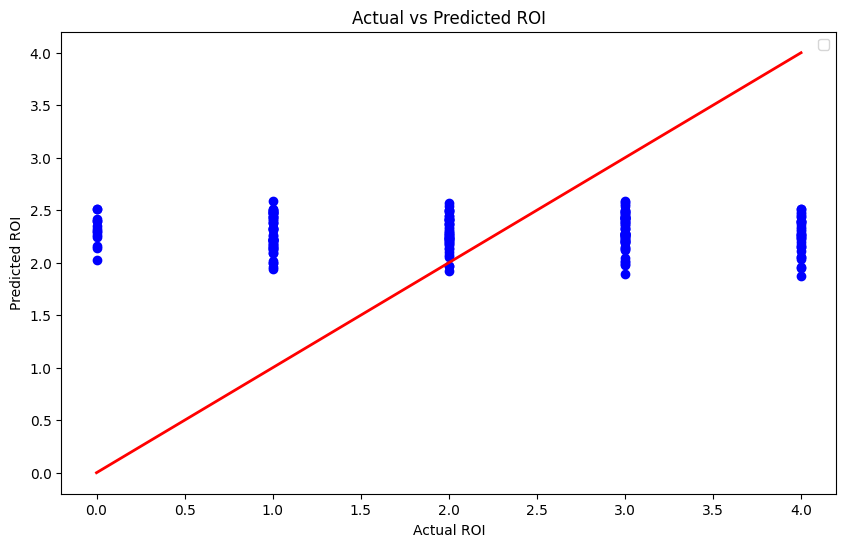

In [72]:
# Plotting predicted vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual ROI')
plt.ylabel('Predicted ROI')
plt.title('Actual vs Predicted ROI')
plt.legend()
plt.show()

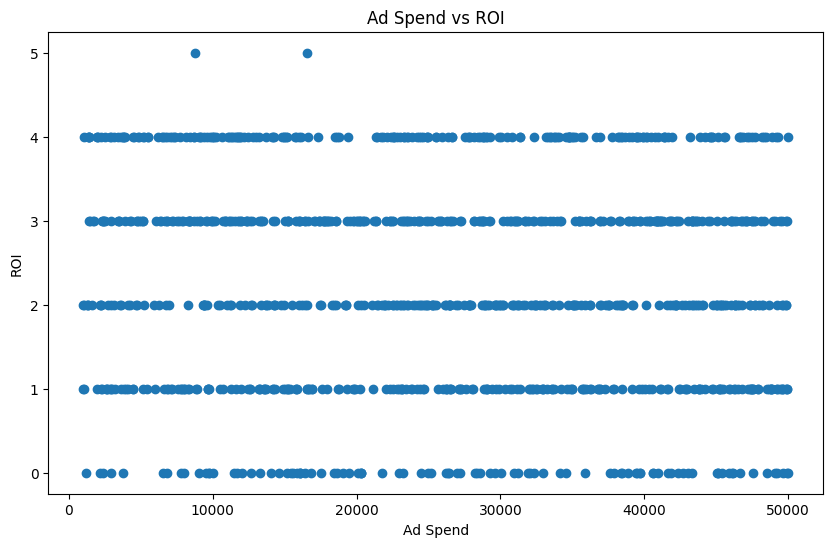

In [51]:
#plot between Ad_Spend and ROI
plt.figure(figsize=(10, 6))
plt.scatter(df['Ad_Spend'], df['ROI'])
plt.xlabel('Ad Spend')
plt.ylabel('ROI')
plt.title('Ad Spend vs ROI')
plt.show()